In [3]:
import pandas as pd
import numpy as np 
import plotly.express as px
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import dash_bootstrap_components as dbc
import plotly.graph_objects as go

In [5]:
all_scopes = pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/all_scopes.csv")
scope1a= pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope1_sums.csv")
scope1b= pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope1B_MTCDE.csv")
scope2= pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope2_sums.csv")
scope3= pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope3_MTCDEs.csv")

In [5]:
all_scopes = all_scopes.fillna(0).drop(columns=["Unnamed: 0"]).rename(columns={"value":"MTCDE"})

In [39]:
all_scopes.to_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/all_scopes.csv")

In [19]:
scope1a= scope1a.fillna(0).drop(columns=["Unnamed: 0"]).rename(columns={"Year":"Fiscal_Year","value":"MTCDE","Emission Source":"Emissions_Source"})

In [41]:
scope1a.to_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope1_sums.csv")

In [25]:
scope1b= scope1b.drop(columns=["Unnamed: 0"])

In [43]:
scope1b.to_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope1B_MTCDE.csv")

In [31]:
scope2= scope2.fillna(0).drop(columns=["Unnamed: 0"]).rename(columns={"Year":"Fiscal_Year","value":"MTCDE","Emissions Source":"Emissions_Source"})

In [35]:
scope2= scope2.rename(columns={"Emissions Source":"Emissions_Source"})

In [45]:
scope2.to_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope2_sums.csv")

In [49]:
scope3= scope3.fillna(0).drop(columns=["Unnamed: 0"]).rename(columns={"value":"MTCDE"})

In [51]:
scope3

,Emissions_Source,Fiscal_Year,MTCDE
0,Mileage,FY2006,225.8
1,Taxis,FY2006,20.6
2,Bus,FY2006,68.0
3,Airplanes,FY2006,1349.0
4,Trains,FY2006,25.1
...,...,...,...
103,Taxis,FY2023,33.9
104,Bus,FY2023,122.0
105,Airplanes,FY2023,2305.8
106,Trains,FY2023,22.6


In [53]:
scope3.to_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope3_MTCDEs.csv")

In [55]:
all_scopes

,Emissions_Source,Fiscal_Year,MTCDE
0,Scope1,FY2006,26957.8
1,Scope2,FY2006,634.8
2,Scope3,FY2006,1826.0
3,Offsets_Internal,FY2006,0.0
4,Offsets_External,FY2006,-864.6
...,...,...,...
90,Scope1,FY2024,2617.9
91,Scope2,FY2024,0.0
92,Scope3,FY2024,3921.2
93,Offsets_Internal,FY2024,0.0


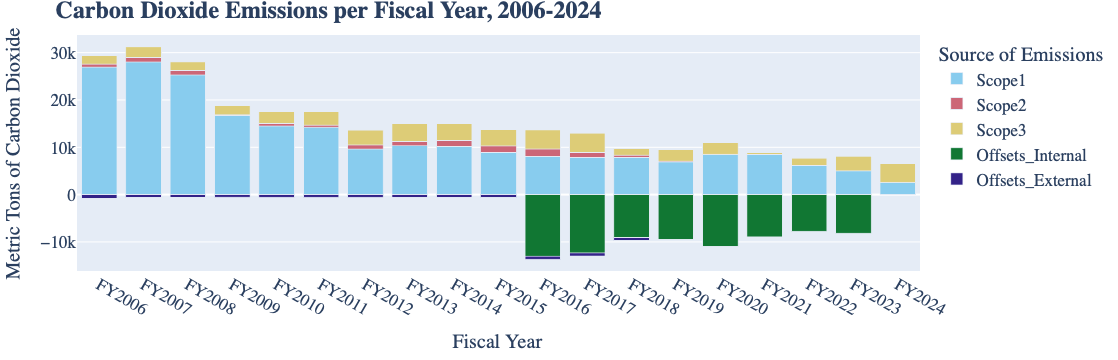

In [227]:
fig= px.bar(all_scopes,x="Fiscal_Year",y="MTCDE", color= "Emissions_Source",color_discrete_sequence= px.colors.qualitative.Safe,hover_data={"Fiscal_Year":False,"Emissions_Source":False,"MTCDE":True},
            labels={"MTCDE":"Metric Tons of Carbon Dioxide","Fiscal_Year":"Fiscal Year", "Emissions_Source":"Source of Emissions"},
            title= "Carbon Dioxide Emissions per Fiscal Year, 2006-2024") 
fig.update_layout(font_family="Balto",font=dict(size=17), margin=dict(l=20, r=20, t=35, b=20))
fig.update_layout(title_font_weight=1000)
fig.update_xaxes(rangeselector_font_size=12,rangeselector_font_weight=1000,rangeselector_visible=True)#autotickangles=[83])
#fig.update_layout(hovermode="y unified")
fig.show()

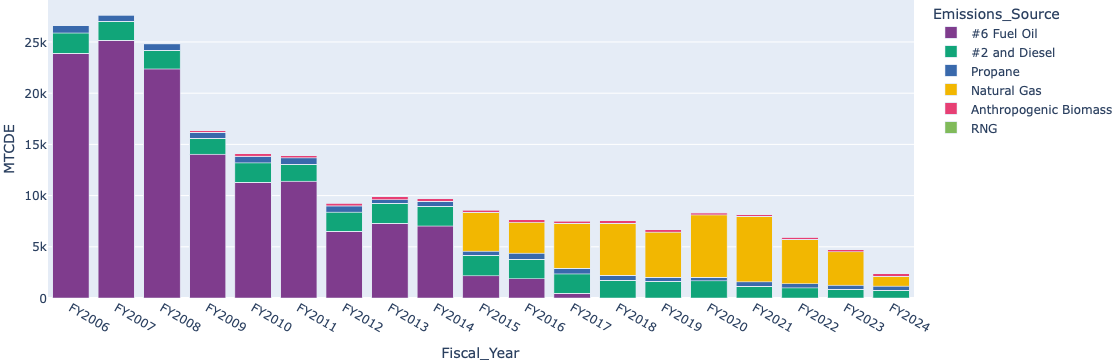

In [243]:
fig= px.bar(scope1a, x= "Fiscal_Year",y="MTCDE", color= "Emissions_Source",color_discrete_sequence= px.colors.qualitative.Bold)
fig.update_layout(margin=dict(l=10, r=10, t=0, b=0))
fig.show()

In [247]:
scope1b

,Emissions_Source,Fiscal_Year,value
0,Gas,FY2006,242.9
1,Diesel,FY2006,123.2
2,Gas,FY2007,253.7
3,Diesel,FY2007,138.8
4,Gas,FY2008,241.9
5,Diesel,FY2008,184.7
6,Gas,FY2009,202.2
7,Diesel,FY2009,136.2
8,Gas,FY2010,229.6
9,Diesel,FY2010,181.1


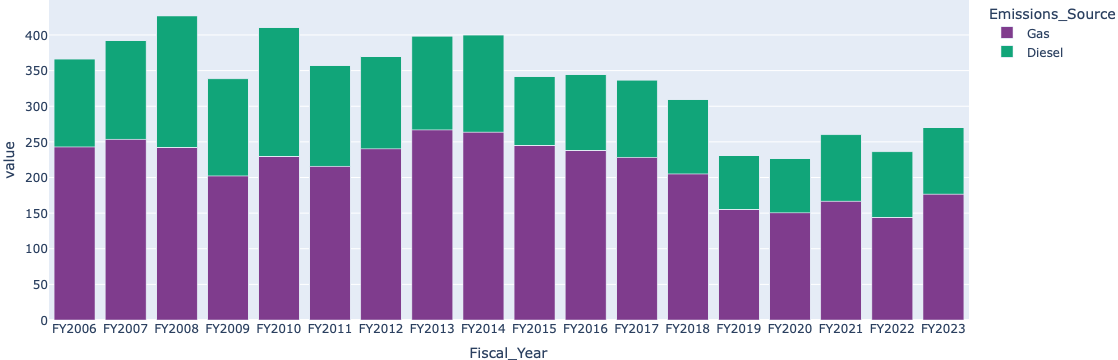

In [337]:
fig= px.bar(scope1b, x= "Fiscal_Year",y="value", color= "Emissions_Source",color_discrete_sequence= px.colors.qualitative.Bold)
fig.update_layout(margin=dict(l=10, r=10, t=0, b=0))
fig.show()

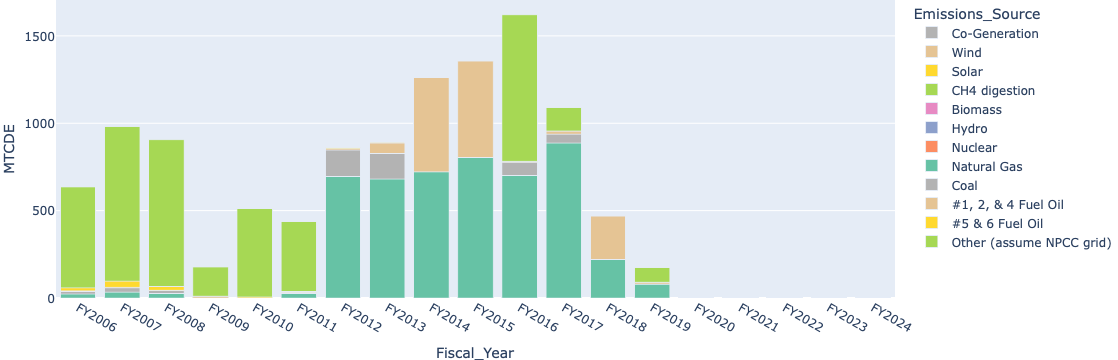

In [351]:
fig= px.bar(scope2, x= "Fiscal_Year",y="MTCDE", color= "Emissions_Source",color_discrete_sequence= px.colors.qualitative.Set2_r)
fig.update_layout(margin=dict(l=10, r=10, t=0, b=0))
fig.show()

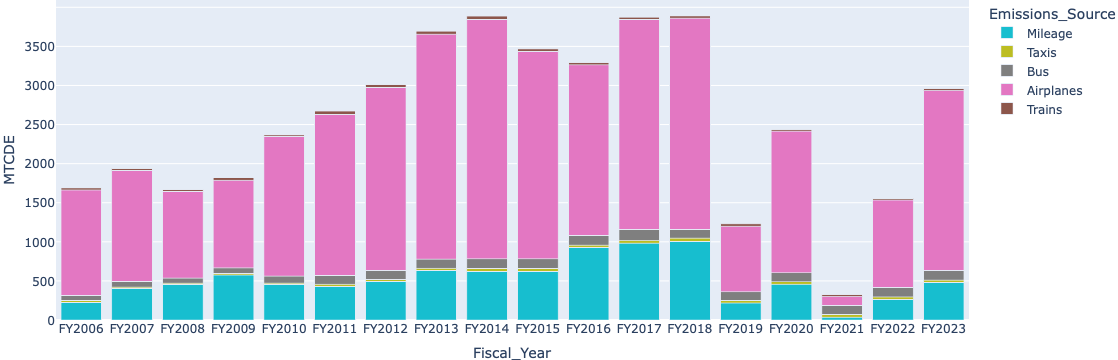

In [311]:
fig= px.bar(scope3[scope3["Emissions_Source"]!="Total"], x= "Fiscal_Year",y="MTCDE", color= "Emissions_Source",color_discrete_sequence= px.colors.qualitative.D3_r)
fig.update_layout(margin=dict(l=10, r=10, t=0, b=0))
fig.show()



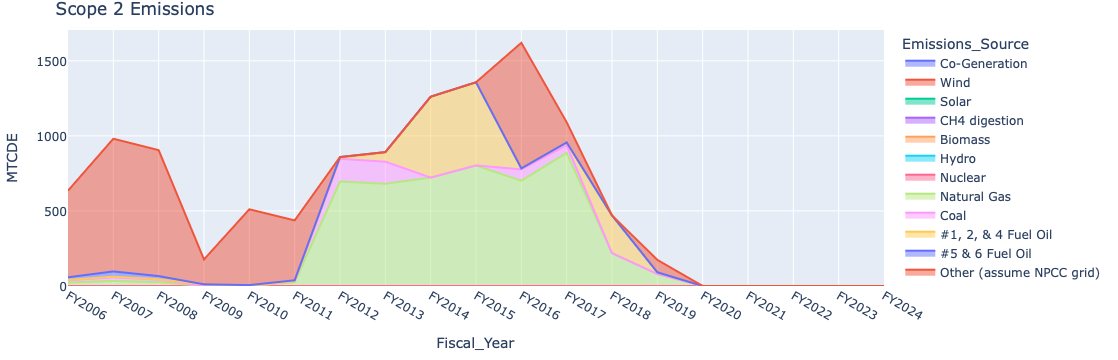

In [45]:
fig = px.area(scope2, x= "Fiscal_Year",y="MTCDE", color= "Emissions_Source",title="Scope 2 Emissions")
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
fig.show()